**Project** **Introduction**

**Objective**

The goal of this project is to analyze Netflix content trends and understand
how the platform’s catalog has evolved over time in terms of content type,
country production, genre distribution, and release patterns.

In [1]:
!unzip archive\ \(1\).zip

Archive:  archive (1).zip
  inflating: netflix_titles.csv      


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [3]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [6]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

/tmp/ipython-input-2040577743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2040577743.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

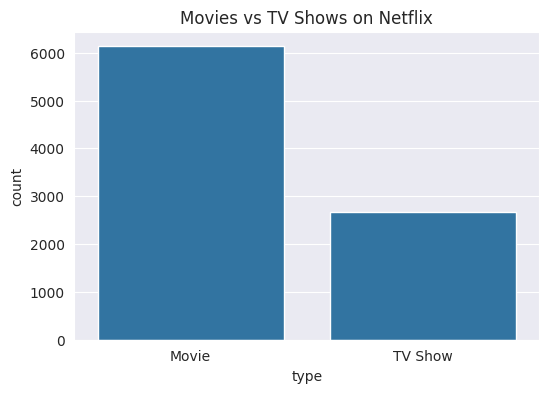

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

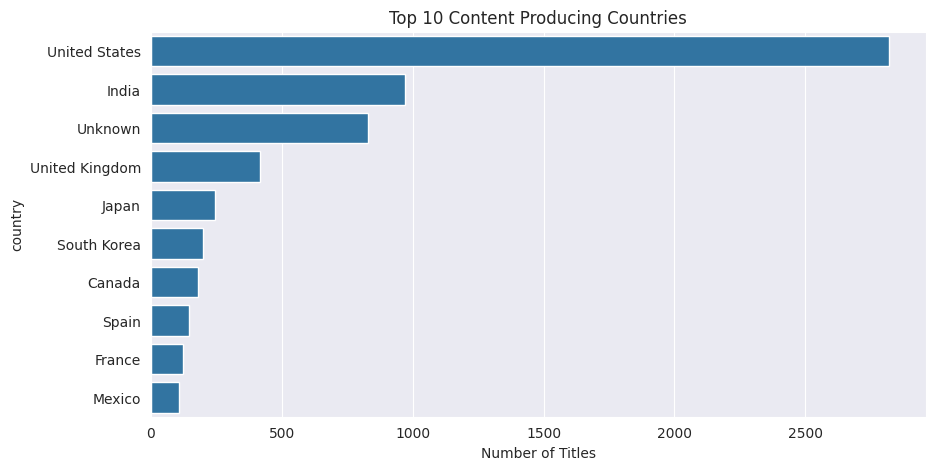

In [8]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content Producing Countries")
plt.xlabel("Number of Titles")
plt.show()

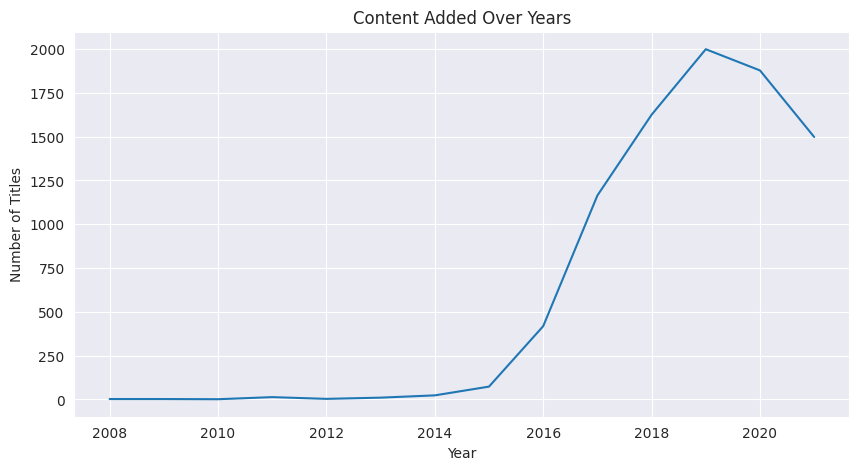

In [9]:
df['year_added'] = df['date_added'].dt.year
content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
content_by_year.plot()
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

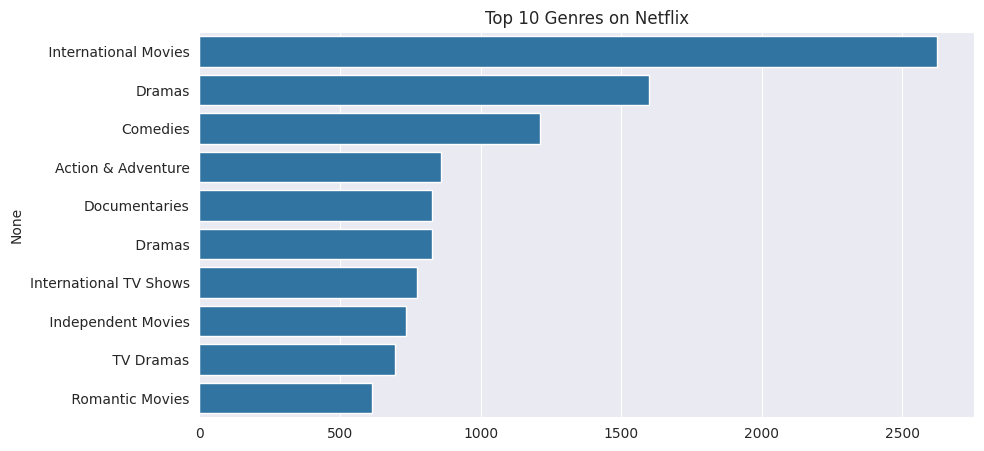

In [10]:
genres = df['listed_in'].str.split(',', expand=True).stack()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.show()

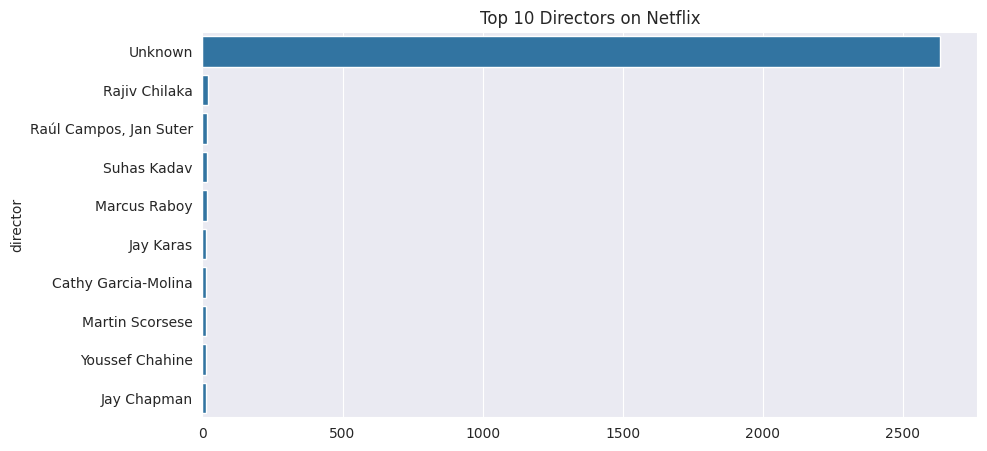

In [11]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors on Netflix")
plt.show()

Final Insights

Key Insights

• Netflix heavily prioritizes movies over TV shows, indicating a content strategy focused on quick-consumption entertainment rather than long-term episodic engagement.

• Content addition sharply increased after 2016, suggesting aggressive platform expansion during global market penetration years.

• The United States dominates content production, but a significant rise in international titles shows Netflix’s shift toward global audience localization.

• Drama and International genres are most frequent, highlighting Netflix’s strategy of emotionally driven and culturally adaptable storytelling.

• A small number of directors contribute disproportionately to the catalog, implying recurring partnerships with selected creators.

In [13]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1f5yeb3TiRVdRQx5XQ8vlwEKKCfgAdBLSJdS6OwGMtgY/edit#gid=0
